# Subplots

There are several ways to combine plots and share information between them. For example, it is possible to share the same x (or y) axis and thus avoid to repeat the labels.

This notebook shows how to make subplots using meteorological data from the agroforestry project at the Eberswalde University for Sustainable Development.

## Import libraries and data

Import the needed libaries.

GridSpec is used for plots with panels of different size

gaussian_kde is used to draw a density function on top of the histograms on the example with the joint plot

In [1]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

from matplotlib.gridspec import GridSpec
from scipy.stats.kde import gaussian_kde

Import the data from the csv file...

In [2]:
df = pd.read_csv('data/agroforst1.csv', sep=';')
df.head()

,Date,Temperature,Relative Humidity,Dew Point,Rain
0,2019-07-05 10:50:00,18.25,64.68,11.50,0.0
1,2019-07-05 10:55:00,18.27,64.12,11.39,0.0
2,2019-07-05 11:00:00,17.31,66.58,11.04,0.0
3,2019-07-05 11:05:00,16.96,68.21,11.08,0.0
4,2019-07-05 11:10:00,17.22,68.62,11.42,0.0


... and set the date/time to be the index:

In [3]:
df.index = pd.DatetimeIndex( df['Date'] )
df = df.drop( ['Date'], axis='columns' )
df.head()

,Temperature,Relative Humidity,Dew Point,Rain
Date,,,,
2019-07-05 10:50:00,18.25,64.68,11.50,0.0
2019-07-05 10:55:00,18.27,64.12,11.39,0.0
2019-07-05 11:00:00,17.31,66.58,11.04,0.0
2019-07-05 11:05:00,16.96,68.21,11.08,0.0
2019-07-05 11:10:00,17.22,68.62,11.42,0.0


## Subplots with the same size and shared axes

The first example uses the same x axis for two plots, one on top of the other. This first panel shows an empty plot, to see the structure of the program.

Note that the parameter "sharex" in plt.subplots() tells matplotlib to use the same x-axis. Try to delete it and see that then each subplot gets a separate axis.

[<AxesSubplot:> <AxesSubplot:>]


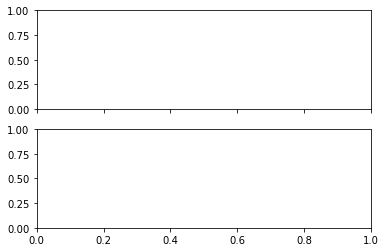

In [15]:
#---------------------------------------------------------------------
# Part 1: Create a figure and axis using plt.subplots
fig, ax = plt.subplots( nrows=2, ncols=1, sharex='col' ) #ncols=1 is the default, it can be omitted

#---------------------------------------------------------------------
# Part 2: Plot, modify, plot again, include text, etc.

print(ax) # <- ax is now a list of 2 axes one for each panel!!

#---------------------------------------------------------------------
# Part 3: Show, save to file, and close

plt.show()
#---------------------------------------------------------------------

Now with the meteorological data, temperature in the top panel and relative humidity in the bottom.

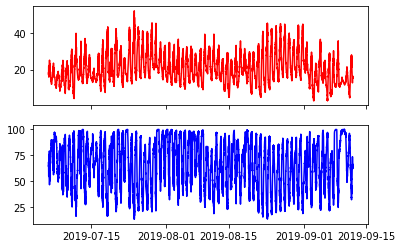

In [13]:
#---------------------------------------------------------------------
# Part 1: Create a figure and axis using plt.subplots
fig, ax = plt.subplots( nrows=2, ncols=1, sharex='col' ) #ncols=1 is the default, it can be omitted

#---------------------------------------------------------------------
# Part 2: Plot, modify, plot again, include text, etc.

ax[0].plot( df.index, df['Temperature'], color='red' )
ax[1].plot( df.index, df['Relative Humidity'], color='blue' )

#---------------------------------------------------------------------
# Part 3: Show, save to file, and close

plt.show()
#---------------------------------------------------------------------

That is the main structure of subplots with shared x axis. The rest is giving format. It is shown in the next cell, using one week of data, instead of the complete period.

Define a second data frame with a single week of data:

In [16]:
start = pd.Timestamp( '2019-07-15 00:00' )
end = pd.Timestamp( '2019-07-22 00:00' )

one_week = df[ (df.index>=start) & (df.index<end) ]

Note that the format of the x axis is executed over ax[1] and automatically adjusted on ax[0].

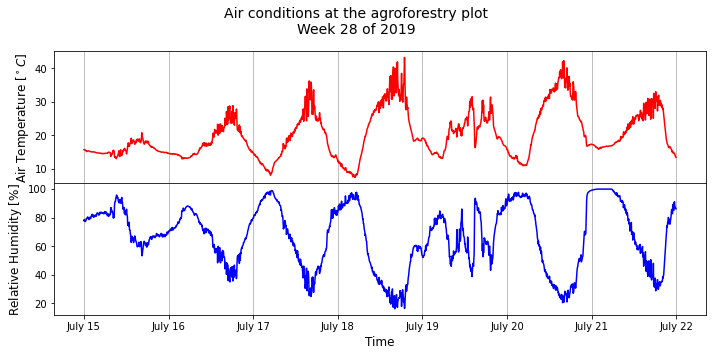

In [36]:
#---------------------------------------------------------------------
# Part 1: Create a figure and axis using plt.subplots
fig, ax = plt.subplots( nrows=2, ncols=1, sharex='col', figsize=(10,5) ) #ncols=1 is the default, it can be omitted

#---------------------------------------------------------------------
# Part 2: Plot, modify, plot again, include text, etc.

ax[0].plot( one_week.index, one_week['Temperature'], color='red' )
ax[1].plot( one_week.index, one_week['Relative Humidity'], color='blue' )

#Format axes
ax[1].xaxis.set_major_locator( mdates.DayLocator( ) )
ax[1].xaxis.set_major_formatter( mdates.DateFormatter('%B %d') ) 

# Grid, only vertical, to see the days
ax[0].grid(axis='x')
ax[1].grid(axis='x')

# Labels on the axes and title
ax[0].set_ylabel('Air Temperature $[^\circ C]$', fontsize=12)
ax[1].set_ylabel('Relative Humidity $[\%]$', fontsize=12)
ax[1].set_xlabel('Time', fontsize=12)

fig.suptitle('Air conditions at the agroforestry plot\nWeek 28 of 2019', fontsize=14)
#---------------------------------------------------------------------
# Part 3: Show, save to file, and close

# rearrange the subplots to be closer together
plt.tight_layout() 
fig.subplots_adjust( hspace=0.0 )
plt.show()
#---------------------------------------------------------------------

**Note**

The codes for the format of date and time can be consulted here:
    
https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior

# Subplots with different arrangement and sizes using GridSpec

GridSpec allows for more flexibility on creating subplots. 

It makes a grid on which we define each of the subplots. The subplots use one or more of the spaces in the grid.

Note: in this case we do **not** use plt.subplots(), because the subplots will be created later and added manually.

### 2 rows and 2 columns with GridSpec

This first example expands the plot above to show a boxplot on the right of each time series.

It creates a grid of 5 horizontal and 2 vertical spaces. 4 of the 5 horizontal spaces will be used for the run plots, and the last one for the boxplots.

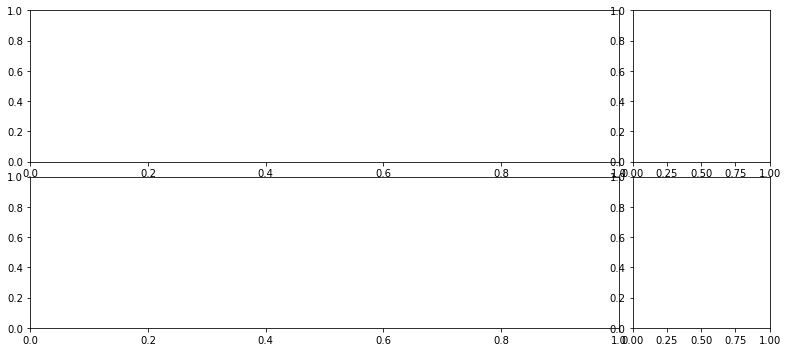

In [43]:
#----------------------------------------------
fig = plt.figure( figsize=(11,5) )
gs = GridSpec(2,5) # number of rows and then number of columns

# ---------------------------------------------
# We can name the axes (panels) as needed!
ax_temp1 = fig.add_subplot( gs[0, 0:4] ) # row 0, columns 0 to 3
ax_temp2 = fig.add_subplot( gs[0, 4] ) # row 0, column 4

ax_rhum1 = fig.add_subplot( gs[1, 0:4] )
ax_rhum2 = fig.add_subplot( gs[1, 4] )

# ---------------------------------------------
plt.tight_layout()
fig.subplots_adjust( hspace=0.1, wspace=0.1 )
plt.show()

We adjust the direction of the ticks in all axes before plotting the actual data.

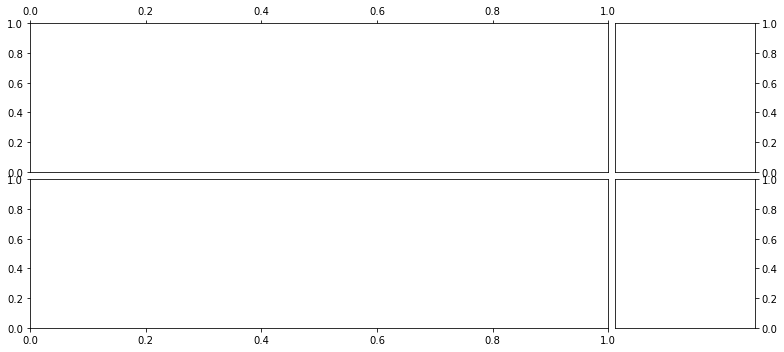

In [46]:
#----------------------------------------------
fig = plt.figure( figsize=(11,5) )
gs = GridSpec(2,5) # number of rows and then number of columns

# ---------------------------------------------
# We can name the axes (panels) as needed!
ax_temp1 = fig.add_subplot( gs[0, 0:4] ) # row 0, columns 0 to 3
ax_temp2 = fig.add_subplot( gs[0, 4] ) # row 0, column 4
ax_rhum1 = fig.add_subplot( gs[1, 0:4] )
ax_rhum2 = fig.add_subplot( gs[1, 4] )

# ---------------------------------------------
# Here the actual plots

# ---------------------------------------------
# Adjust the ticks on all axes

ax_temp1.tick_params(direction = 'out')
ax_temp1.xaxis.tick_top()
ax_temp2.set_xticks([])
ax_temp2.yaxis.tick_right()

ax_rhum1.tick_params(direction = 'out')
ax_rhum2.set_xticks([])
ax_rhum2.yaxis.tick_right()

# ---------------------------------------------
plt.tight_layout()
fig.subplots_adjust( hspace=0.05, wspace=0.05 )
plt.show()

Now make the actual plots with the one-week data:

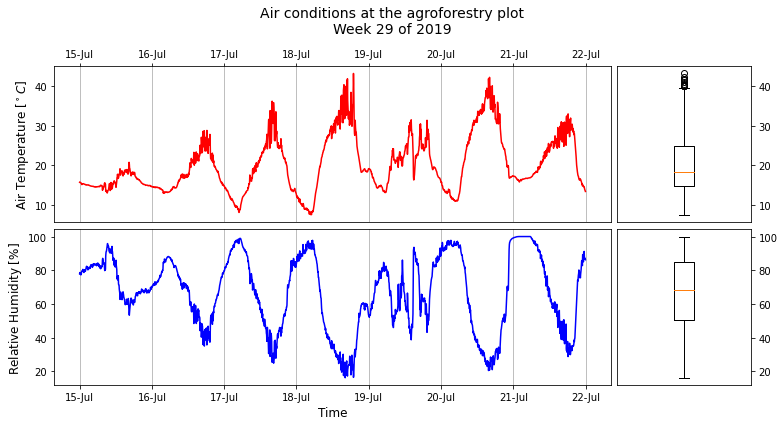

In [49]:
#----------------------------------------------
fig = plt.figure( figsize=(11,6) )
gs = GridSpec(2,5) # number of rows and then number of columns

# ---------------------------------------------
# We can name the axes (panels) as needed!
ax_temp1 = fig.add_subplot( gs[0, 0:4] ) # row 0, columns 0 to 3
ax_temp2 = fig.add_subplot( gs[0, 4] ) # row 0, column 4
ax_rhum1 = fig.add_subplot( gs[1, 0:4] )
ax_rhum2 = fig.add_subplot( gs[1, 4] )

# ---------------------------------------------
# Here the actual plots

# Run plots on the left
ax_temp1.plot( one_week.index, one_week['Temperature'], color='red' )
ax_rhum1.plot( one_week.index, one_week['Relative Humidity'], color='blue' )

# Boxplots on the right
ax_temp2.boxplot( one_week['Temperature'], )
ax_rhum2.boxplot( one_week['Relative Humidity'], )


#Format axes
ax_temp1.xaxis.set_major_locator( mdates.DayLocator( ) )
ax_temp1.xaxis.set_major_formatter( mdates.DateFormatter('%d-%b') ) 
ax_rhum1.xaxis.set_major_locator( mdates.DayLocator( ) )
ax_rhum1.xaxis.set_major_formatter( mdates.DateFormatter('%d-%b') ) 

# Grid, only vertical, to see the days
ax_temp1.grid(axis='x')
ax_rhum1.grid(axis='x')

# Labels on the axes and title
ax_temp1.set_ylabel('Air Temperature $[^\circ C]$', fontsize=12)
ax_rhum1.set_ylabel('Relative Humidity $[\%]$', fontsize=12)
ax_rhum1.set_xlabel('Time', fontsize=12)

fig.suptitle('Air conditions at the agroforestry plot\nWeek 29 of 2019', fontsize=14)

# ---------------------------------------------
# Adjust the ticks on all axes

ax_temp1.tick_params(direction = 'out')
ax_temp1.xaxis.tick_top()
ax_temp2.set_xticks([])
ax_temp2.yaxis.tick_right()

ax_rhum1.tick_params(direction = 'out')
ax_rhum2.set_xticks([])
ax_rhum2.yaxis.tick_right()

# ---------------------------------------------
plt.tight_layout()
fig.subplots_adjust( hspace=0.05, wspace=0.05 )
plt.show()

Lastly, give some format to the boxplots, to look a little better:

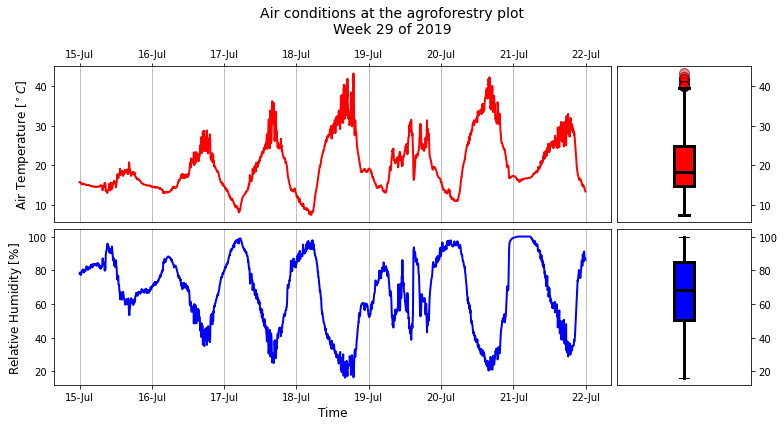

In [50]:
#----------------------------------------------
fig = plt.figure( figsize=(11,6) )
gs = GridSpec(2,5) # number of rows and then number of columns

# ---------------------------------------------
# We can name the axes (panels) as needed!
ax_temp1 = fig.add_subplot( gs[0, 0:4] ) # row 0, columns 0 to 3
ax_temp2 = fig.add_subplot( gs[0, 4] ) # row 0, column 4
ax_rhum1 = fig.add_subplot( gs[1, 0:4] )
ax_rhum2 = fig.add_subplot( gs[1, 4] )

# ---------------------------------------------
# Here the actual plots

# Run plots on the left
ax_temp1.plot( one_week.index, one_week['Temperature'], color='red', linewidth=2 )
ax_rhum1.plot( one_week.index, one_week['Relative Humidity'], color='blue', linewidth=2 )

# Boxplots on the right, now with fancy format
bp1 = ax_temp2.boxplot( one_week['Temperature'], vert=True, \
                        showfliers=True, patch_artist=True )
for box in bp1['boxes']:
    box.set( color='black', linewidth=3)
    box.set( facecolor = 'red' )
for whisker in bp1['whiskers']:
    whisker.set(color='black',linestyle='-', linewidth=3)
for cap in bp1['caps']:
    cap.set(color='black', linewidth=3)
for median in bp1['medians']:
    median.set(color='black', linewidth=3)
for flier in bp1['fliers']:
    flier.set( marker='o', markersize=10, markerfacecolor='red', linewidth=2, alpha=0.5, zorder=-1 )

bp2 = ax_rhum2.boxplot( one_week['Relative Humidity'], vert=True, \
                        showfliers=True, patch_artist=True )
for box in bp2['boxes']:
    box.set( color='black', linewidth=3)
    box.set( facecolor = 'blue' )
for whisker in bp2['whiskers']:
    whisker.set(color='black',linestyle='-', linewidth=3)
for cap in bp1['caps']:
    cap.set(color='black', linewidth=3)
for median in bp2['medians']:
    median.set(color='black', linewidth=3)
for flier in bp2['fliers']:
    flier.set( marker='o', markersize=10, markerfacecolor='blue', linewidth=2, alpha=0.5, zorder=-1 )
    



#Format axes
ax_temp1.xaxis.set_major_locator( mdates.DayLocator( ) )
ax_temp1.xaxis.set_major_formatter( mdates.DateFormatter('%d-%b') ) 
ax_rhum1.xaxis.set_major_locator( mdates.DayLocator( ) )
ax_rhum1.xaxis.set_major_formatter( mdates.DateFormatter('%d-%b') ) 

# Grid, only vertical, to see the days
ax_temp1.grid(axis='x')
ax_rhum1.grid(axis='x')

# Labels on the axes and title
ax_temp1.set_ylabel('Air Temperature $[^\circ C]$', fontsize=12)
ax_rhum1.set_ylabel('Relative Humidity $[\%]$', fontsize=12)
ax_rhum1.set_xlabel('Time', fontsize=12)

fig.suptitle('Air conditions at the agroforestry plot\nWeek 29 of 2019', fontsize=14)

# ---------------------------------------------
# Adjust the ticks on all axes

ax_temp1.tick_params(direction = 'out')
ax_temp1.xaxis.tick_top()
ax_temp2.set_xticks([])
ax_temp2.yaxis.tick_right()

ax_rhum1.tick_params(direction = 'out')
ax_rhum2.set_xticks([])
ax_rhum2.yaxis.tick_right()

# ---------------------------------------------
plt.tight_layout()
fig.subplots_adjust( hspace=0.05, wspace=0.05 )
plt.show()

### A scatterplot with densities in both axes (joint plot) using GridSpec

The following example defines a grid of 4x4 spaces. From them, it uses 3x3 for a big scatterplot of temperature against relative humidity, and adds a histogram aligned with each axis, on the remaining 1x3 and 3x1 spaces to the top and left of the scatterplot.

The funciton gaussian_kde() from scipy (scientific python) is used to plot an estimate of the probability distribution over the histograms. This is a common technique in exploratory data analysis (EDA).

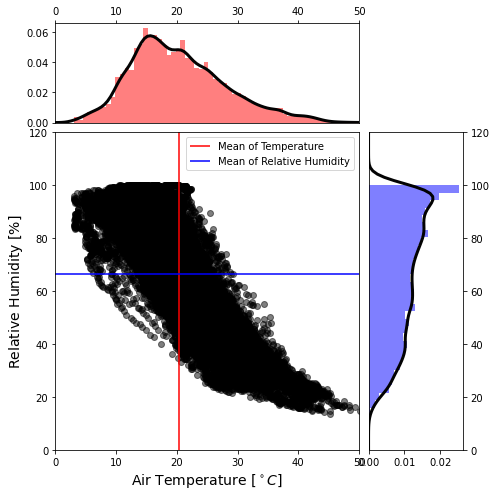

In [56]:
#----------------------------------------------
fig = plt.figure( figsize=(7,7) )

gs = GridSpec(4, 4)

ax_scatter = fig.add_subplot( gs[1:4, 0:3] )
ax_hist_x = fig.add_subplot( gs[0, 0:3] )
ax_hist_y = fig.add_subplot( gs[1:4, 3] )

xlims = [0,50]
ylims = [0,120]

x = df['Temperature']
y = df['Relative Humidity']

# ---------------------------------------------

# Drawing the lines of the means
ax_scatter.vlines( x.mean(), ylims[0], ylims[1], color='red', label='Mean of Temperature' )
ax_scatter.hlines( y.mean(), xlims[0], xlims[1], color='blue', label='Mean of Relative Humidity' )

ax_scatter.scatter( x, y, color='black', alpha=0.5 )

ax_scatter.set_xlabel('Air Temperature $[^\circ C]$', fontsize=14)
ax_scatter.set_ylabel('Relative Humidity $[\%]$', fontsize=14)

# Histogram of x (top)-------------------------
#ax_hist_x.plot([0,1],[0,1],color='coral')
ax_hist_x.hist( x, density=True, color='red', bins='fd', 
               histtype='bar',
               orientation='vertical', alpha=0.5)

rangex = np.linspace( xlims[0], xlims[1], 100 )   
kde = gaussian_kde( x )
ax_hist_x.plot( rangex, kde(rangex), linewidth=3, 
               color='black', alpha=0.99  )

# Histogram of y (right)-------------------------
#ax_hist_y.plot([0,1],[0,1],color='blue')
ax_hist_y.hist( y, density=True, color='blue', bins='fd',
               orientation='horizontal', alpha=0.5)
rangey = np.linspace( ylims[0], ylims[1], 100 )   
kde = gaussian_kde( y )
ax_hist_y.plot( kde(rangey), rangey, linewidth=3, 
               color='black', alpha=0.99  )

# Final tuning --------------------------------
ax_scatter.set_xlim(xlims)
ax_scatter.set_ylim(ylims)
ax_scatter.legend(loc=0)

ax_hist_x.set_xlim(xlims)
#ax_hist_x.set_ylim([0,1]) # uncomment to see the actual density

#ax_hist_y.set_xlim([0,1]) # uncomment to see the actual density
ax_hist_y.set_ylim(ylims)

ax_hist_x.tick_params(direction = 'out')
ax_hist_x.xaxis.tick_top()
ax_hist_y.tick_params(direction = 'out')
ax_hist_y.yaxis.tick_right()

# ---------------------------------------------

plt.tight_layout()
fig.subplots_adjust( hspace=0.1, wspace=0.1 )
plt.show()

In [55]:
plt.hist?